In [2]:
### 匯入所需的函式庫 ###

import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import img_to_array
from PIL import Image


In [3]:
### 設定模型超參數 ###

batch_size = 32
num_classes = 10
epochs = 10


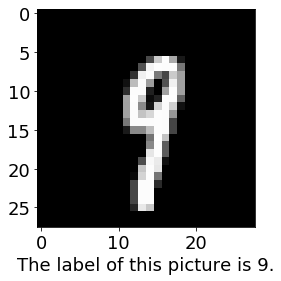

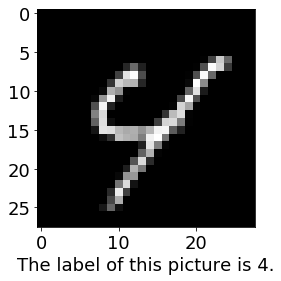

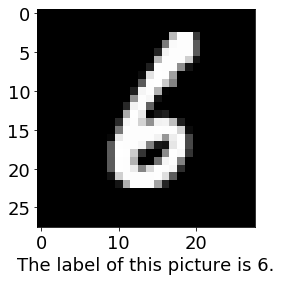

In [4]:
### 匯入mnist資料集 & 查看測試集中隨機的三張圖片及其標籤 ###

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.rcParams.update({'font.size': 18})

for i in range(0,3):
    randNum = np.random.randint(len(x_test))
    randImage = x_test[randNum]
    pixels = randImage.reshape((28, 28))
    plt.xlabel('The label of this picture is ' + str(y_test[randNum]) + '.')
    plt.imshow(pixels, cmap='gray')
    plt.show()


In [5]:
### 圖片資料預處理 ###
    
# input image dimensions
img_rows, img_cols = 28, 28

# 調整資料的維度
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 特徵標準化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # 使灰階的範圍落在0~1之間
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices (label one-hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
### 建立CNN模型 ###

# initializing CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#model.add(MaxPooling2D(pool_size = (2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

# 印出模型中各層的輸出維度
for layer in model.layers:
    print(layer.output_shape)



(None, 26, 26, 32)
(None, 24, 24, 64)
(None, 12, 12, 64)
(None, 9216)
(None, 128)
(None, 10)


In [7]:
### 配適模型 & 查看模型預測測試集的準確率 ###

# early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto') # default 

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3,
          callbacks = [early_stopping]) # 用訓練集中的三成資料作為驗證集
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 44s 1ms/step - loss: 0.1323 - accuracy: 0.9597 - val_loss: 0.0643 - val_accuracy: 0.9803
Epoch 2/10
42000/42000 [==============================] - 43s 1ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0544 - val_accuracy: 0.9832
Epoch 3/10
42000/42000 [==============================] - 43s 1ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0515 - val_accuracy: 0.9856
Epoch 4/10
42000/42000 [==============================] - 43s 1ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 0.0490 - val_accuracy: 0.9860
Epoch 5/10
42000/42000 [==============================] - 43s 1ms/step - loss: 0.0130 - accuracy: 0.9955 - val_loss: 0.0507 - val_accuracy: 0.9871
Test loss: 0.04267369294057562
Test accuracy: 0.9890000224113464


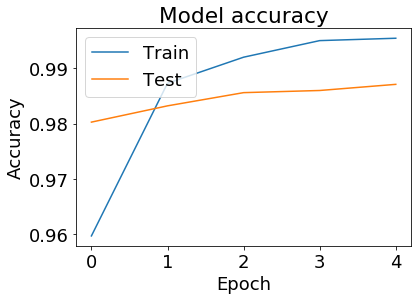

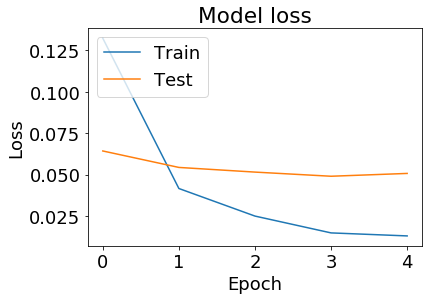

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
### 查看模型預測測試集隨機一筆資料的結果 ###

model.predict(x_test[np.random.randint(len(x_test))].reshape(1, 28, 28, 1))


array([[1.3925164e-10, 2.5903546e-09, 4.0000927e-05, 2.1454294e-08,
        2.1321596e-15, 3.9093022e-16, 2.6914145e-18, 9.9995995e-01,
        8.7257831e-12, 7.9595919e-10]], dtype=float32)

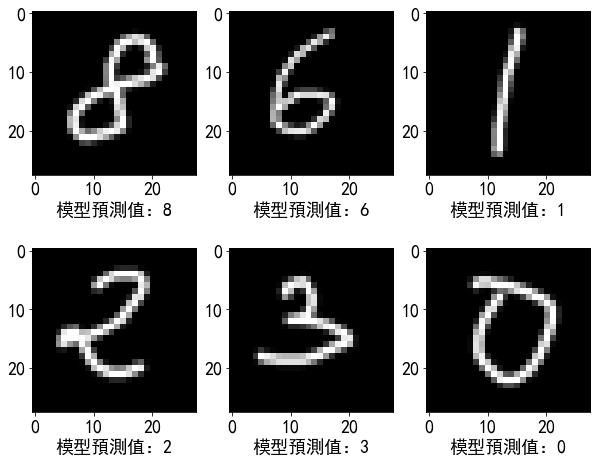

In [12]:
### 用模型來預測自己手寫的數字 ###

from keras.preprocessing.image import img_to_array
from PIL import Image

plt.rcParams['font.sans-serif'] = ['simhei']
plt.subplots(figsize=(10, 8))

for i in range(1, 7):
    image =  Image.open("./dataset/predict/" + str(i) +".png").convert('L')
    image = image.resize((28, 28))
    image = img_to_array(image)
    image = image.astype('float32')
    image /= 255
    #image = np.expand_dims(image, axis = 0)
    #print(image.shape)
    
    pixels = image.reshape((28, 28))
    plt.subplot(230 + i)
    plt.xlabel('模型預測值：' + str(int(model.predict_classes(image.reshape(1, 28, 28, 1)))))
    plt.imshow(pixels, cmap='gray')


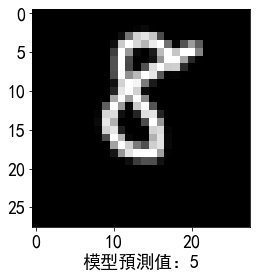

In [13]:
# 如果 數字沒有寫在中間的地方 or 數字的線條太粗或是太細 可能會使模型預測出來的結果失準
plt.rcParams['font.sans-serif'] = ['simhei']

image =  Image.open("./dataset/predict/7.png").convert('L')
image = image.resize((28, 28))
image = img_to_array(image)
image = image.astype('float32')
image /= 255
pixels = image.reshape((28, 28))
plt.xlabel('模型預測值：' + str(int(model.predict_classes(image.reshape(1, 28, 28, 1)))))
plt.imshow(pixels, cmap='gray')


In [14]:
### 儲存模型 ###

# 將模型儲存至 HDF5 檔案中
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'


In [ ]:
### 載入模型 ###

model = tf.contrib.keras.models.load_model('./my_model.h5')
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
